<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep neural network in scratch

**[Problem 1] Classification of fully connected layers**

In [1]:
import numpy as np
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
        pass
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """       
        self.X = X 
        A = X @ self.W + self.B
        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """

        self.dW = self.X.T @ dA
        self.dB = np.sum(dA, axis=0)
        dZ = dA @ self.W.T


        self = self.optimizer.update(self)
        return dZ

**[Problem 2] Classification of initialization method**

In [2]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

**[Problem 3] Classification of optimization methods**

In [13]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

**[Problem 4] Classification of activation function**

In [14]:
class Softmax:
  """
  Activation function Softmax
  """
  def __init__(self, batch_size):
      self.batch_size = batch_size
      pass
  
  def forward(self, X):
    result = np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
    return result

  def backward(self, dX, y):
    result = (dX - y)/self.batch_size
    return result

**[Problem 4] Classification of activation function**

In [15]:
class Tanh:
  """
  Activation function Tanh
  """
  def __init__(self):
      pass
  
  def forward(self, X):
    self.tanh = (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
    return self.tanh

  def backward(self, dX):
    result = dX * (1 - self.tanh**2)
    return result

In [5]:
class Relu:
  """
  Activation function Relu
  """
  def __init__(self):
      pass
  
  def forward(self, X):
    self.X = X
    result = np.max([np.zeros(X.shape), X], axis=0) 
    return result

  def backward(self, dX):
    Z = self.X
    dZ = np.array(dX, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    return dZ

**[Problem 6] Initial value of weight**

In [6]:
# XavierInitializer
class XavierInitializer:
    """
    XavierInitializer
    Parameters
    ----------
    """
    def __init__(self):
      pass

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        self.xavier = 1/np.sqrt(n_nodes1)
        W = self.xavier * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.xavier * np.random.randn(1, n_nodes2)
        return B

In [7]:
# HeInitializer
class HeInitializer:
    """
    HeInitializer
    Parameters
    ----------
    """
    def __init__(self):
      pass

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        self.he = np.sqrt(2/n_nodes1)
        W = self.he * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.he * np.random.randn(1, n_nodes2)
        return B

**[Problem 7] Optimization method**

In [8]:
class AdaGrad:
    """
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.HW = 0
        self.HB = 0

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        self.HW += layer.dW * layer.dW
        self.HB += layer.dB * layer.dB
        layer.W -= self.lr *(1/np.sqrt(self.HW + 1e-7) * layer.dW) # divided by zero occured so I'm adding  1e-7
        layer.B -= self.lr *(1/np.sqrt(self.HB + 1e-7) * layer.dB)
        return layer

**[Problem 8] Completion of class**

In [9]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [10]:
class ScratchDeepNeuralNetworkClassifier():
    """
    DeepNeuralNetworkClassifier

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self,batch_size = 20,n_features = 784,n_nodes1 = 400,n_nodes2 = 200,n_output = 10,sigma = 0.02,lr = 0.01,epoch = 10, verbose=True):
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2 
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        self.loss_train = []
        self.loss_val = []

    def fit(self, X, y, X_val=None, y_val=None):
      # self.sigma : ガウス分布の標準偏差
      # self.lr : 学習率
      # self.n_nodes1 : 1層目のノード数
      # self.n_nodes2 : 2層目のノード数
      # self.n_output : 出力層のノード数
      
      optimizer = SGD(self.lr)
      self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
      self.activation1 = Tanh()
      self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
      self.activation2 = Tanh()
      self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
      self.activation3 = Softmax(batch_size = self.batch_size)
      for i in range(self.epoch):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        for mini_X_train, mini_y_train in get_mini_batch:
          self.forward(mini_X_train)
          self.backward(mini_X_train, mini_y_train)
          self.loss_train.append(self.cross_entropy_error(mini_y_train, self.Z3))
        print (i)
        if X_val is not None:
          self.forward(X_val)
          self.loss_val.append(self.cross_entropy_error(y_val, self.Z3))
      if self.verbose:
        if X_val is None:
            print(self.loss_train)
        else:
            print(self.loss_train,self.loss_val)

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        self.forward(X)
        return np.argmax(self.Z3, axis=1)

    def forward(self, X):
      A1 = self.FC1.forward(X)
      Z1 = self.activation1.forward(A1)
      A2 = self.FC2.forward(Z1)
      Z2 = self.activation2.forward(A2)
      A3 = self.FC3.forward(Z2)
      self.Z3 = self.activation3.forward(A3)
      #print ("Z3: " + str(self.Z3.shape))
    
    def backward(self, X, y):
      dA3 = self.activation3.backward(self.Z3, y) # 交差エントロピー誤差とソフトマックスを合わせている
      dZ2 = self.FC3.backward(dA3)
      dA2 = self.activation2.backward(dZ2)
      dZ1 = self.FC2.backward(dA2)
      dA1 = self.activation1.backward(dZ1)
      dZ0 = self.FC1.backward(dA1) # dZ0は使用しない

    def cross_entropy_error(self, y, Z):
      L = - np.sum(y * np.log(Z+1e-7)) / len(y)
      return L

In [11]:
# data preperation
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8

#flattened
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

#Preprocessing 
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
uint8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


1.0
0.0
(60000,)
(60000, 10)
float64
(48000, 784)
(12000, 784)


In [16]:
#Learning and estimation
nn = ScratchDeepNeuralNetworkClassifier(epoch=5)
nn.fit(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0
1
2
3
4
[2.295405333454077, 2.3067167296500424, 2.2885702119072646, 2.307760920197715, 2.291907645939209, 2.2946923649026867, 2.307222630986087, 2.2909289492596043, 2.3029977659044585, 2.298946617236505, 2.295577775790816, 2.3042592318794974, 2.298049765990743, 2.2942856039931514, 2.2964508727991277, 2.3058702283959525, 2.296359528438912, 2.2974663195214413, 2.2891422566941455, 2.292629075393253, 2.3047138871039388, 2.298666145274125, 2.293754945616026, 2.3001342958214175, 2.2881963441335436, 2.294211933324525, 2.2826984801342984, 2.299021852795422, 2.299515920964003, 2.294443276084644, 2.294710072057236, 2.2966862502503966, 2.291635548261405, 2.2891734492217566, 2.2772708679400826, 2.2866899552837716, 2.3029714756958133, 2.283678435662239, 2.2835857374231545, 2.287451821131762, 2.2836388614493814, 2.283000090042328, 2.2859918320062667, 2.297298652327549, 2.2868815429167304, 2.279587572272164, 2.2842989362867745, 2.2786560226370973, 2.2776541383567688, 2.28215372490489, 2.28401618401

In [17]:
from sklearn.metrics import accuracy_score
pred_train = nn.predict(X_val)
y_val1 = np.argmax(y_val, axis = 1)
accuracy = accuracy_score(y_val1, pred_train)
print ('Accuracy: ' + str(accuracy))

Accuracy: 0.9221666666666667


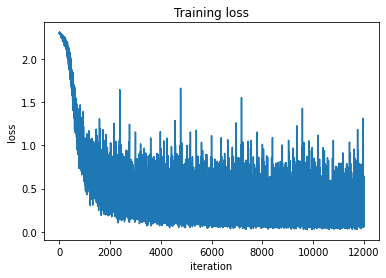

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( nn.loss_train, label = 'Training loss')
plt.xlabel ('iteration')
plt.ylabel ('loss')
plt.title ('Training loss')
plt.show()

**[Question 9] Learning and Estimation**

In [19]:
class ScratchDeepNeuralNetworkClassifierInf():
    """
    DeepNeuralNetworkClassifier

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, layers, activations, batch_size = 20, n_output = 10,sigma = 0.02, lr = 0.01,epoch = 10, verbose=True):
        self.verbose = verbose
        self.layers = layers # neural network layer's definition with initializer and optimizer
        self.activations = activations
        self.batch_size = batch_size
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        self.loss_train = []
        self.loss_val = []

    def fit(self, X, y, X_val=None, y_val=None):
      for i in range(self.epoch):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        for mini_X_train, mini_y_train in get_mini_batch:
          self.forward(mini_X_train)
          self.backward(mini_X_train, mini_y_train)
          self.loss_train.append(self.cross_entropy_error(mini_y_train, self.output))
        print ("Epoch: " + str(i))
        if X_val is not None:
          self.forward(X_val)
          self.loss_val.append(self.cross_entropy_error(y_val, self.output))
      if self.verbose:
        if X_val is None:
            print(self.loss_train)
        else:
            print(self.loss_train,self.loss_val)

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        self.forward(X)
        return np.argmax(self.output, axis=1)

    def forward(self, X):
      for layer in range(len(self.layers)):
        X = self.layers[layer].forward(X)
        X = self.activations[layer].forward(X)
      self.output = X
    
    def backward(self, X, y):
      layer = len(self.layers) - 1
      backward = self.activations[layer].backward(self.output, y) # 交差エントロピー誤差とソフトマックスを合わせている
      backward = self.layers[layer].backward(backward)
      while (layer>0):
        layer = layer-1
        backward = self.activations[layer].backward(backward)
        backward = self.layers[layer].backward(backward)
        

    def cross_entropy_error(self, y, Z):
      L = - np.sum(y * np.log(Z+1e-7)) / len(y)
      return L

In [23]:
#Same as previous one
layers = {0: FC(784, 400, SimpleInitializer(0.01), SGD(0.01)),
        1: FC(400, 200, SimpleInitializer(0.01), SGD(0.01)),
      2: FC(200, 10, SimpleInitializer(0.01), SGD(0.01))}

activations = {0: Tanh(),
               1: Tanh(),
               2: Softmax(batch_size = 20)}

nn = ScratchDeepNeuralNetworkClassifierInf(layers = layers, activations = activations, epoch=5)
nn.fit(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
[2.302842172861677, 2.3024919592881945, 2.300464260506989, 2.3036967873524237, 2.3007822865843255, 2.3026772763289474, 2.301167733552149, 2.3017092647057344, 2.304684737273161, 2.3055020414109126, 2.3010785616007823, 2.3050668662731164, 2.3011380185073333, 2.3011423521141503, 2.302169252580298, 2.298955628025562, 2.301168052133513, 2.298174814040262, 2.2988100133674285, 2.301257158701984, 2.3040902559402183, 2.302508691941857, 2.299147140379863, 2.2996952115397677, 2.301125746273623, 2.3021539049665103, 2.2981895080889245, 2.302088620901996, 2.3053921985922052, 2.303374457931218, 2.3035176743680226, 2.3028456160614303, 2.3033224484529393, 2.302976174216689, 2.297579394903959, 2.3009148357136633, 2.3050976976085678, 2.2977294645173165, 2.2996932358638267, 2.299607737009117, 2.298558193634147, 2.303011983697393, 2.2980827677186793, 2.304661085112616, 2.302102595875868, 2.299734774026054, 2.3024140317751853, 2.3002287866401465, 2.29777264377995

In [26]:
from sklearn.metrics import accuracy_score
pred_train = nn.predict(X_val)
y_val1 = np.argmax(y_val, axis = 1)
accuracy = accuracy_score(y_val1, pred_train)
print ('Accuracy: ' + str(accuracy))

Accuracy: 0.9128333333333334


In [27]:
#Changed the initializer and optimizer
layers2 = {0: FC(784, 400, HeInitializer(), AdaGrad(0.01)),
        1: FC(400, 200, HeInitializer(), AdaGrad(0.01)),
      2: FC(200, 10, HeInitializer(), AdaGrad(0.01))}

activations2 = {0: Tanh(),
               1: Tanh(),
               2: Softmax(batch_size = 20)}

nn_he_ada = ScratchDeepNeuralNetworkClassifierInf(layers = layers2, activations = activations2, epoch=5)
nn_he_ada.fit(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
[2.376344269143428, 9.421016303388768, 4.282417538752684, 2.867833600467082, 3.6108490613411712, 2.3596814857865036, 1.934023651111885, 1.3076118458763333, 1.083694477472252, 1.372675567547988, 1.0604617758655641, 0.5284863573411647, 1.3175483407838215, 0.7426604465118215, 0.648041600641152, 0.42151884925581873, 1.1260327408417896, 0.5974801864033836, 0.2413864551593889, 0.5663279008455585, 0.9632684599241212, 0.6922918996457428, 0.677809620202308, 0.4325293364214133, 0.7572755959438415, 0.7517922126839143, 0.4748760665005025, 0.5175895548722067, 1.1894793306447125, 0.7257472137499832, 1.0513239495792974, 0.7966163624465266, 0.5674796789679252, 1.1593822681154782, 0.5622460033367428, 0.8776862588147589, 0.6719437737379901, 0.7820796319950165, 0.8254219394214786, 0.4844636982203224, 0.7366694015281199, 0.611871909128505, 0.34030962445788254, 0.35475185872335857, 0.546348392920575, 0.7838715196517284, 0.5821319766118686, 0.3197890508138516, 0.

In [28]:
pred_train2 = nn_he_ada.predict(X_val)
accuracy_he_ada = accuracy_score(y_val1, pred_train2)
print ('Accuracy: ' + str(accuracy_he_ada))

Accuracy: 0.9716666666666667


In [29]:
#Changed the initializer and optimizer
layers3 = {0: FC(784, 400, XavierInitializer(), AdaGrad(0.01)),
        1: FC(400, 200, XavierInitializer(), AdaGrad(0.01)),
      2: FC(200, 10, XavierInitializer(), AdaGrad(0.01))}

activations3 = {0: Relu(),
               1: Relu(),
               2: Softmax(batch_size = 20)}

nn_xavier_ada = ScratchDeepNeuralNetworkClassifierInf(layers = layers3, activations = activations3, epoch=5)
nn_xavier_ada.fit(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
[2.1973867124232527, 7.737137792165514, 2.3447561603042084, 2.2743198060766225, 2.033840425159422, 1.7234342575507138, 1.9464371850702762, 1.6519721864282872, 1.3398197840821322, 1.3169794229938496, 1.2931756252050128, 1.05268407219534, 1.3293793573334223, 0.8419058777422886, 0.8636529103369988, 0.6920482633316067, 1.0933189802558978, 0.8979474296043286, 0.5397271939616233, 0.5926981389932493, 1.202460754847022, 0.789514034658441, 0.7376130200911118, 0.6238767105202282, 0.8992442823626003, 0.8643499081776083, 0.6807438078600694, 0.686698671140298, 1.1762556241081497, 0.9081199726091687, 1.0612918334027672, 0.5752488414339897, 0.8473654198928383, 0.9543864402516373, 0.7232252310994343, 0.9279037560947438, 0.7321106902018482, 0.6719737066024347, 0.7922601233208824, 0.5517095989392707, 0.7723124557800315, 0.40536056431544143, 0.3814868238834513, 0.41621548507514766, 0.5861665601877422, 0.8248209869271467, 0.7355428636353343, 0.29190840876248175

In [30]:
pred_train3 = nn_xavier_ada.predict(X_val)
accuracy_xavier_relu = accuracy_score(y_val1, pred_train3)
print ('Accuracy: ' + str(accuracy_xavier_relu))

Accuracy: 0.9790833333333333


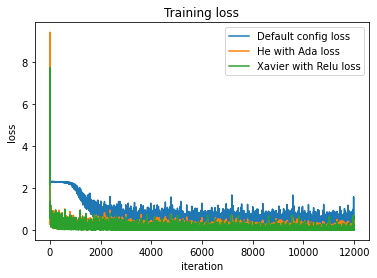

In [31]:
#visualization
plt.plot( nn.loss_train, label = 'Default config loss')
plt.plot( nn_he_ada.loss_train, label = 'He with Ada loss')
plt.plot( nn_xavier_ada.loss_train, label = 'Xavier with Relu loss')
plt.legend()
plt.xlabel ('iteration')
plt.ylabel ('loss')
plt.title ('Training loss')
plt.show()

In [32]:
import pandas as pd
d = {'accuracy':[accuracy, accuracy_he_ada, accuracy_xavier_relu]}
evaluation_result = pd.DataFrame(data=d, index=['Default', 'He with Ada', 'Xavier with Relu'])
print (evaluation_result)

                  accuracy
Default           0.912833
He with Ada       0.971667
Xavier with Relu  0.979083
